# Predicting Compressive Strength of Concrete

To build a regression model to predict the concrete compressive strength based on the different features in the training data.

### Importing Libraries and Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('G:\DATA ANALYSIS\project\machine learning\concrete\Concrete Compressive Strength.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Observation

1.It shows that there are eight independent variables(cement, slag, ash,water,superplastic,coarseagg,fineagg,age)and one dependent variable(strength)

2.All the records are numeric

In [4]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})

### Alternatively:

In [5]:
df.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [6]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Understanding Our Data

In [7]:
#shape of the dataset
df.shape

(1030, 9)

In [8]:
#info about attributes and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   Water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
#stastical summery of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplastic,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseagg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [10]:
#Check for null values
df.isnull().sum()

cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There is no null values in the dataset.

In [11]:
#Check for duplicates in the dataset
df.duplicated().sum()

25

There are 25 duplicates in the dataset.

In [12]:
df.drop_duplicates(inplace=True)

### Exploratory Data Analysis

Text(0.5, 0.98, 'Visualizing Continuous Columns')

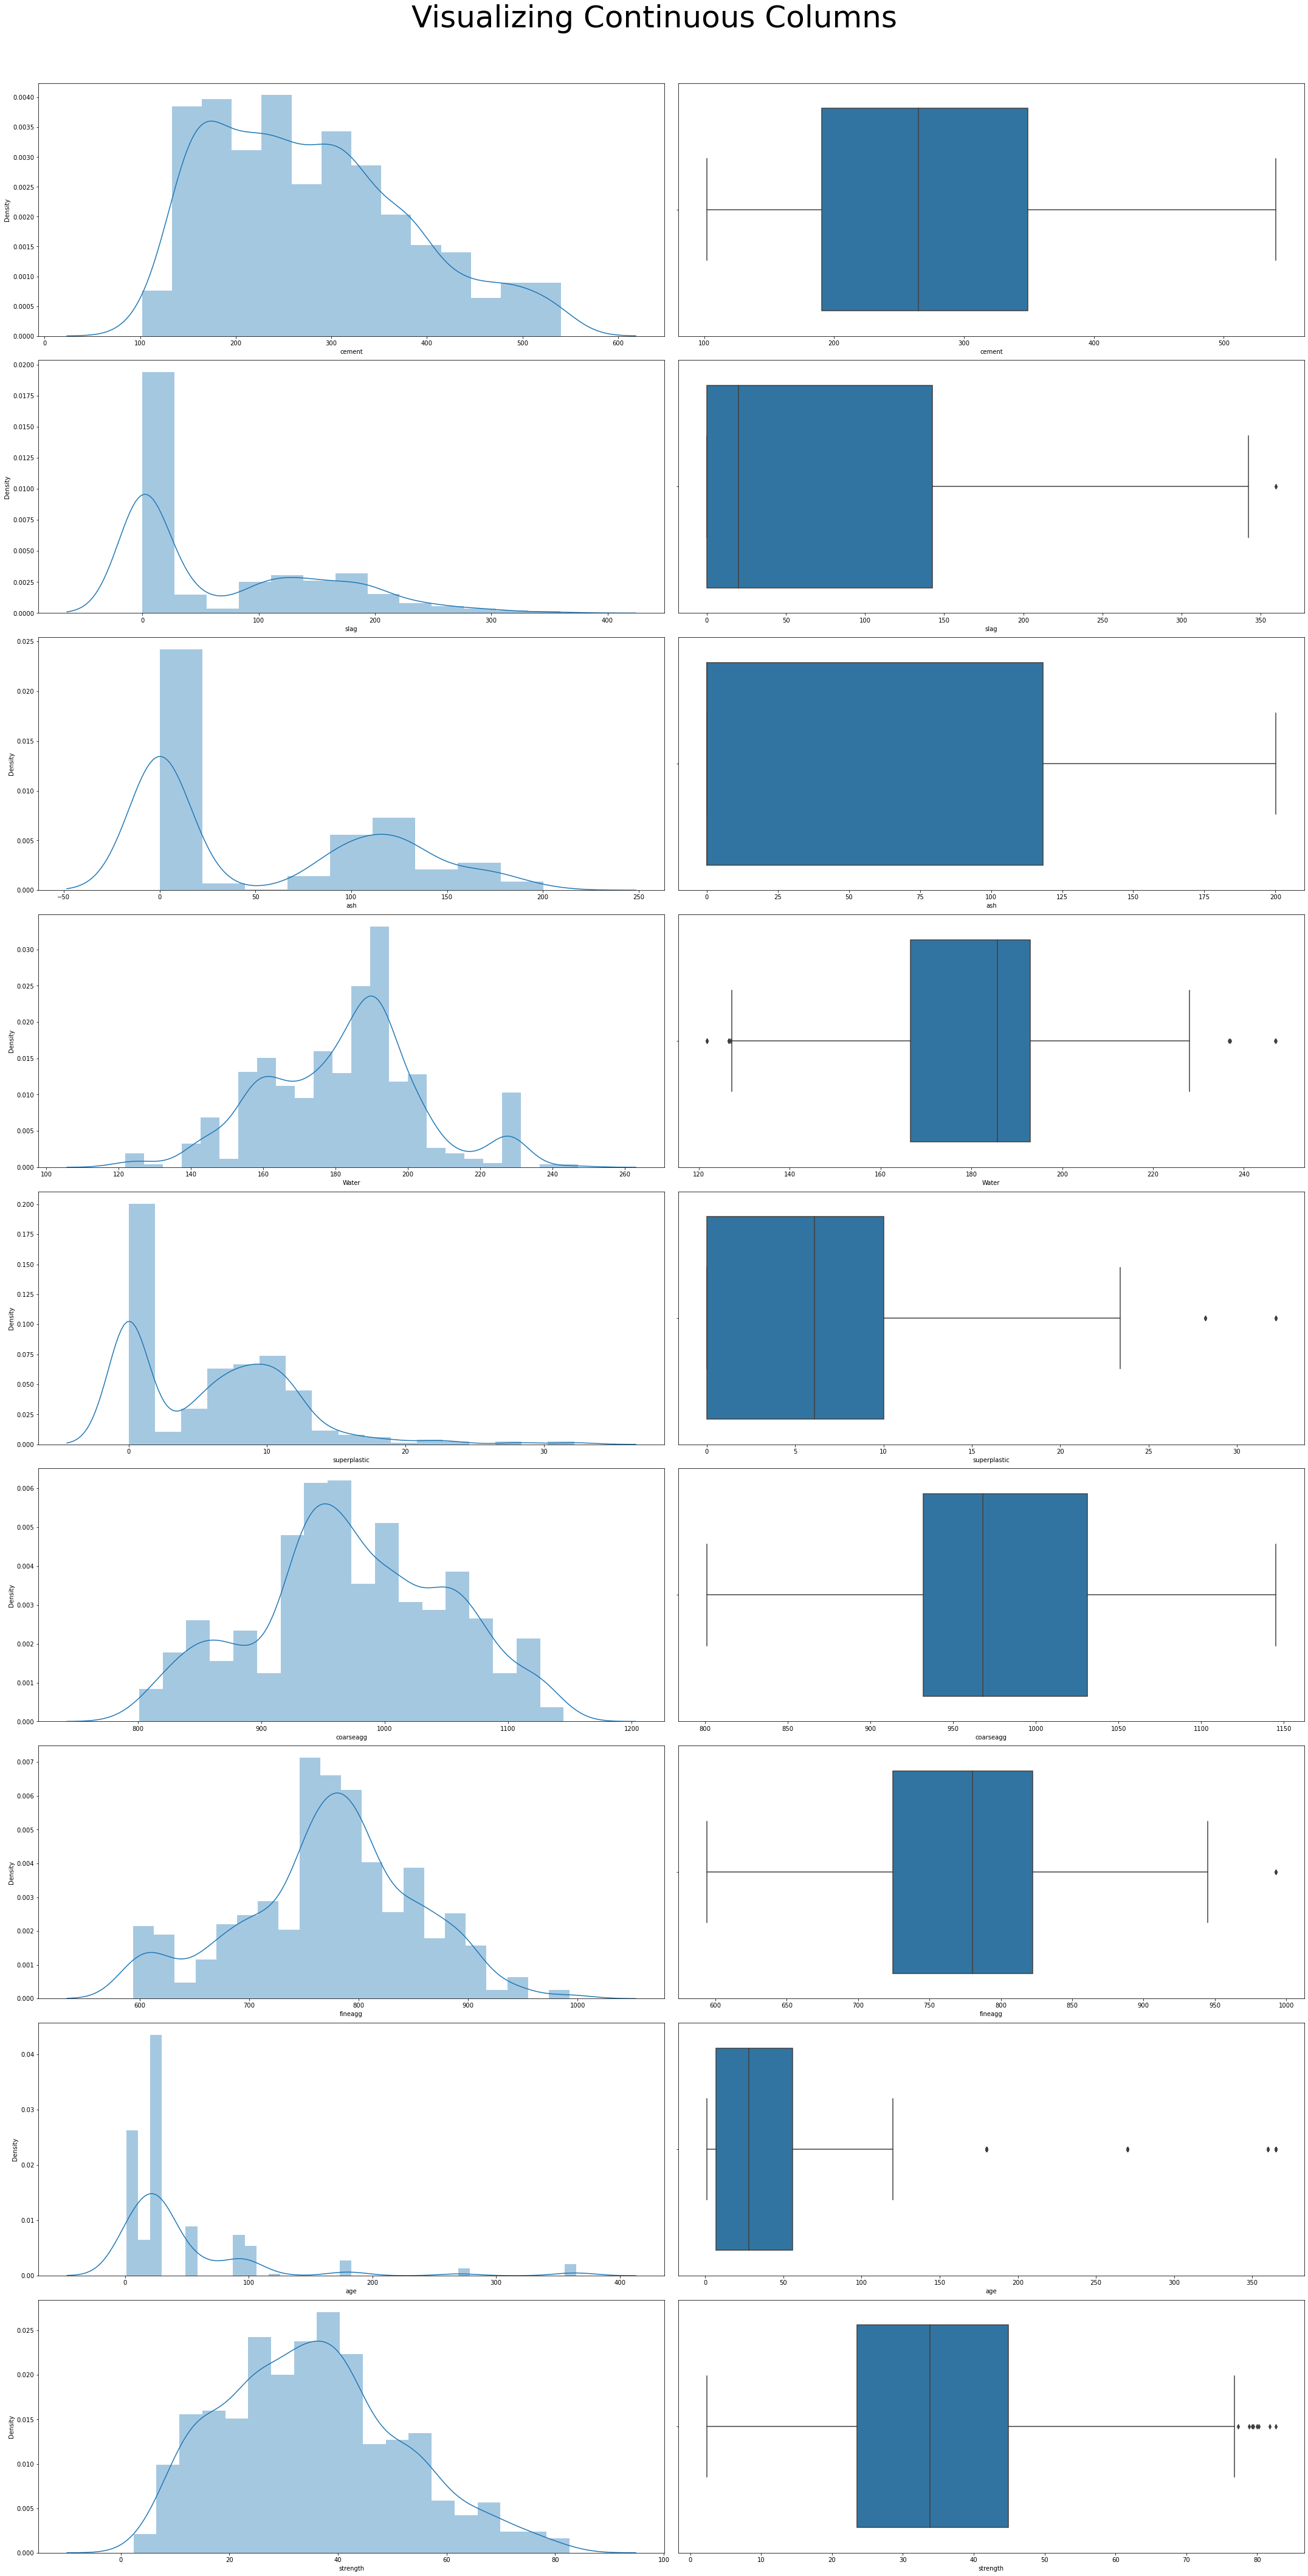

In [44]:
import warnings
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(9,2,figsize=(30,60))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

<AxesSubplot:>

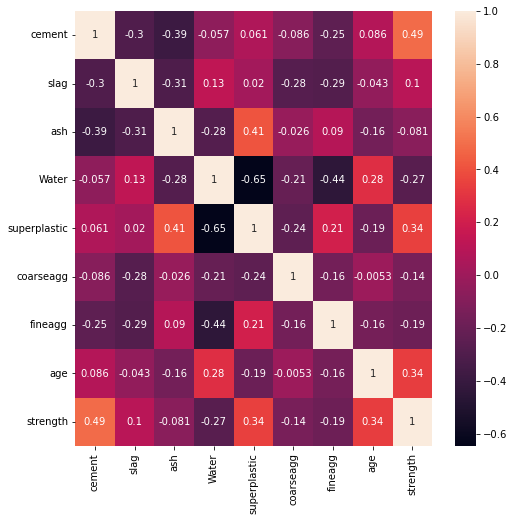

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [55]:
correlation=df.corr()['strength'].sort_values()
correlation


Water          -0.269606
fineagg        -0.186457
coarseagg      -0.144710
ash            -0.080648
slag            0.103370
age             0.337371
superplastic    0.344225
cement          0.488283
strength        1.000000
Name: strength, dtype: float64

It is well known in the construction material industry that the ratio of cement to water in a concrete mix is a valuable variable in determining strength. We can create that feature and investigate its correlation with strength.

<AxesSubplot:>

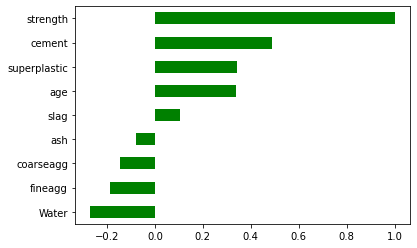

In [56]:
correlation.plot(kind='barh',color='green')

### Splitting the data

In [17]:
X = df.drop(['strength'],axis=1)
y = df['strength']

import warnings
warnings.simplefilter('ignore')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=123)

X_train = pd.DataFrame(scalar.fit_transform(X_train),columns = X_train.columns, index=X_train.index )
X_test = pd.DataFrame(scalar.fit_transform(X_test),columns = X_test.columns, index=X_test.index)

### Model Building

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

models = {
    LinearRegression():'Linear Regression',
    SVR():'Support Vector Regression',
    RandomForestRegressor():'Random Forest',
    KNeighborsRegressor(n_neighbors=10): 'KNN',
    AdaBoostRegressor(n_estimators=100, random_state=0):'AdaBoost',
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0):'Gradient Boosting',
    DecisionTreeRegressor(random_state=0):'Decision Tree'
}

r2_scores = {}

for m in models.keys():
    m.fit(X_train, y_train)
    r2_scores[models[m]] = r2_score(y_test, m.predict(X_test))

for model, score in r2_scores.items():
    print(f"R-squared score for {model} is: {score}")

R-squared score for Linear Regression is: 0.6105752142339215
R-squared score for Support Vector Regression is: 0.611465401256776
R-squared score for Random Forest is: 0.8619375866347772
R-squared score for KNN is: 0.6412480759668405
R-squared score for AdaBoost is: 0.7310417398911477
R-squared score for Gradient Boosting is: 0.8630498958976786
R-squared score for Decision Tree is: 0.7492043499141952


### Train data

In [21]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for each model
lr_params = {'fit_intercept': [True, False], 'normalize': [True, False]}
svr_params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
rf_params = {'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2']}
knn_params = {'n_neighbors': [5, 10, 20], 'weights': ['uniform', 'distance']}
ada_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
dt_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}

# Grid search for each model
lr_grid = GridSearchCV(LinearRegression(), lr_params, cv=5)
svr_grid = GridSearchCV(SVR(), svr_params, cv=5)
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5)
ada_grid = GridSearchCV(AdaBoostRegressor(), ada_params, cv=5)
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)

# Fit each model with grid search
lr_grid.fit(X_train, y_train)
svr_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
ada_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)

# Print best hyperparameters and scores for each model
print("Best hyperparameters and score for Linear Regression:", lr_grid.best_params_, lr_grid.best_score_)
print("Best hyperparameters and score for SVR:", svr_grid.best_params_, svr_grid.best_score_)
print("Best hyperparameters and score for Random Forest:", rf_grid.best_params_, rf_grid.best_score_)
print("Best hyperparameters and score for KNN:", knn_grid.best_params_, knn_grid.best_score_)
print("Best hyperparameters and score for AdaBoost:", ada_grid.best_params_, ada_grid.best_score_)
print("Best hyperparameters and score for Gradient Boosting:", gb_grid.best_params_, gb_grid.best_score_)
print("Best hyperparameters and score for Decision Tree:", dt_grid.best_params_, dt_grid.best_score_)

Best hyperparameters and score for Linear Regression: {'fit_intercept': True, 'normalize': False} 0.5799950780140584
Best hyperparameters and score for SVR: {'C': 10, 'epsilon': 1, 'kernel': 'rbf'} 0.7857310127772976
Best hyperparameters and score for Random Forest: {'max_features': 'log2', 'n_estimators': 500} 0.880542066580578
Best hyperparameters and score for KNN: {'n_neighbors': 5, 'weights': 'distance'} 0.682914301636041
Best hyperparameters and score for AdaBoost: {'learning_rate': 1, 'n_estimators': 100} 0.7743346246830362
Best hyperparameters and score for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200} 0.9043262258769836
Best hyperparameters and score for Decision Tree: {'max_depth': 10, 'min_samples_split': 2} 0.79754500458813


### Test data

In [57]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for each model
lr_params = {'fit_intercept': [True, False], 'normalize': [True, False]}
svr_params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
rf_params = {'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2']}
knn_params = {'n_neighbors': [5, 10, 20], 'weights': ['uniform', 'distance']}
ada_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
dt_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}

# Grid search for each model
lr_grid = GridSearchCV(LinearRegression(), lr_params, cv=5)
svr_grid = GridSearchCV(SVR(), svr_params, cv=5)
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5)
ada_grid = GridSearchCV(AdaBoostRegressor(), ada_params, cv=5)
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)

# Fit each model with grid search
lr_grid.fit(X_test, y_test)
svr_grid.fit(X_test, y_test)
rf_grid.fit(X_test, y_test)
knn_grid.fit(X_test, y_test)
ada_grid.fit(X_test, y_test)
gb_grid.fit(X_test, y_test)
dt_grid.fit(X_test, y_test)

# Print best hyperparameters and scores for each model
print("Best hyperparameters and score for Linear Regression:", lr_grid.best_params_, lr_grid.best_score_)
print("Best hyperparameters and score for SVR:", svr_grid.best_params_, svr_grid.best_score_)
print("Best hyperparameters and score for Random Forest:", rf_grid.best_params_, rf_grid.best_score_)
print("Best hyperparameters and score for KNN:", knn_grid.best_params_, knn_grid.best_score_)
print("Best hyperparameters and score for AdaBoost:", ada_grid.best_params_, ada_grid.best_score_)
print("Best hyperparameters and score for Gradient Boosting:", gb_grid.best_params_, gb_grid.best_score_)
print("Best hyperparameters and score for Decision Tree:", dt_grid.best_params_, dt_grid.best_score_)

Best hyperparameters and score for Linear Regression: {'fit_intercept': True, 'normalize': True} 0.5997642359161903
Best hyperparameters and score for SVR: {'C': 10, 'epsilon': 1, 'kernel': 'rbf'} 0.7169879002802608
Best hyperparameters and score for Random Forest: {'max_features': 'auto', 'n_estimators': 200} 0.817429973773333
Best hyperparameters and score for KNN: {'n_neighbors': 5, 'weights': 'distance'} 0.6082581655172753
Best hyperparameters and score for AdaBoost: {'learning_rate': 1, 'n_estimators': 200} 0.7520962912430247
Best hyperparameters and score for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200} 0.8432091676495508
Best hyperparameters and score for Decision Tree: {'max_depth': 10, 'min_samples_split': 10} 0.6779616548907612


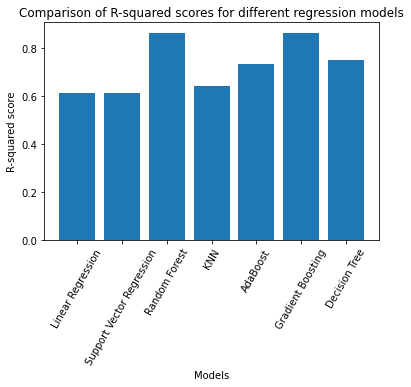

In [43]:
import matplotlib.pyplot as plt

# Get the R-squared scores
scores = list(r2_scores.values())

# Get the names of the models
models_names = list(r2_scores.keys())

# Create a bar graph
plt.bar(models_names, scores)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('R-squared score')
plt.xticks(rotation=60)
plt.title('Comparison of R-squared scores for different regression models')

# Show the plot
plt.show()

### Conclusion 


* In this prediction gradient boosting gives more R2 value, ie 84.32%. 
* This can be interpreted as: Our model can account for 84.32% of the variance in the data.

### Feature Importances

##### Here we get a look at how much each input variable factored in to our final model.

In [37]:

# Fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Create a list of feature names
feature_names = list(X_train.columns)

# Create a dictionary of feature importance scores with their respective feature names
feature_importances = dict(zip(feature_names, importances))

# Sort the dictionary by descending order of importance scores
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))

# Print the sorted feature importances
for feature, importance in sorted_feature_importances.items():
    print("{}: {}".format(feature, importance))

age: 0.3528059071622067
cement: 0.2782506667196931
Water: 0.1173970627707808
superplastic: 0.07697443069701755
slag: 0.07195619145205084
fineagg: 0.043356538822405255
coarseagg: 0.03355801583142079
ash: 0.02570118654442495


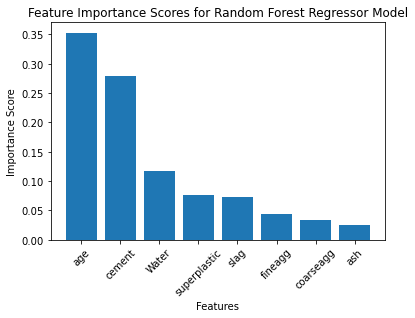

In [42]:
plt.bar(sorted_feature_importances.keys(), sorted_feature_importances.values())

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores for Random Forest Regressor Model')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()